<a href="https://colab.research.google.com/github/custom-hyper/Research/blob/main/Trading_Report_Uniswap_11/20/22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
#@title
!pip install statistics --quiet
!pip install yfinance --quiet
!pip install pytrends --quiet
!pip install pycoingecko --quiet
!pip install pandas --quiet


Setup Environment

In [130]:
#@title Ta-lib – Extra steps { display-mode: "code" }
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

(Reading database ... 124017 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
#@title
id = 'uniswap'



# Big  Picture

Text(0.5, 1.0, 'Google Trends')

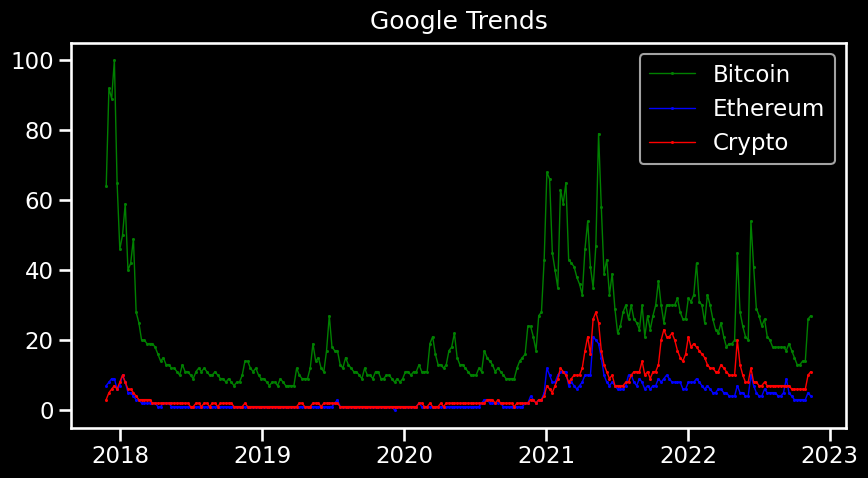

In [132]:
#@title
#@title Google Trends
import seaborn as sns
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(10, 5))
# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()


pytrend.build_payload(kw_list=['Bitcoin', 'Ethereum','Crypto'])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

plt.plot( 'Bitcoin', 'y1', data=df, marker='x', color='green',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Ethereum', 'y2', data=df, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Crypto', 'y3', data=df, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )

#plt.plot( 'Cosmos Crypto', 'y5', data=df, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )
plt.legend()


# title
plt.title('Google Trends', loc='center',pad=10)


In [133]:
#@title
#@title Crypto Fear & Greed Index

import requests

from datetime import datetime
import time
import json
from google.colab import data_table
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt



#General Information table
response = requests.get("https://api.alternative.me/fng/?limit=0")
output = response.text
json_parsed = json.loads(output)

df = pd.json_normalize(json_parsed)


df1 = pd.concat([pd.json_normalize(x) for x in df['data'].values.tolist()])
timeseries = df1['timestamp']
df1['date'] = pd.to_datetime(df1['timestamp'], unit = 's')

df_fear_greed = pd.concat([df1['date'], df1['value']], axis=1)
df3 = pd.concat([df1['date'], df1['value_classification']])

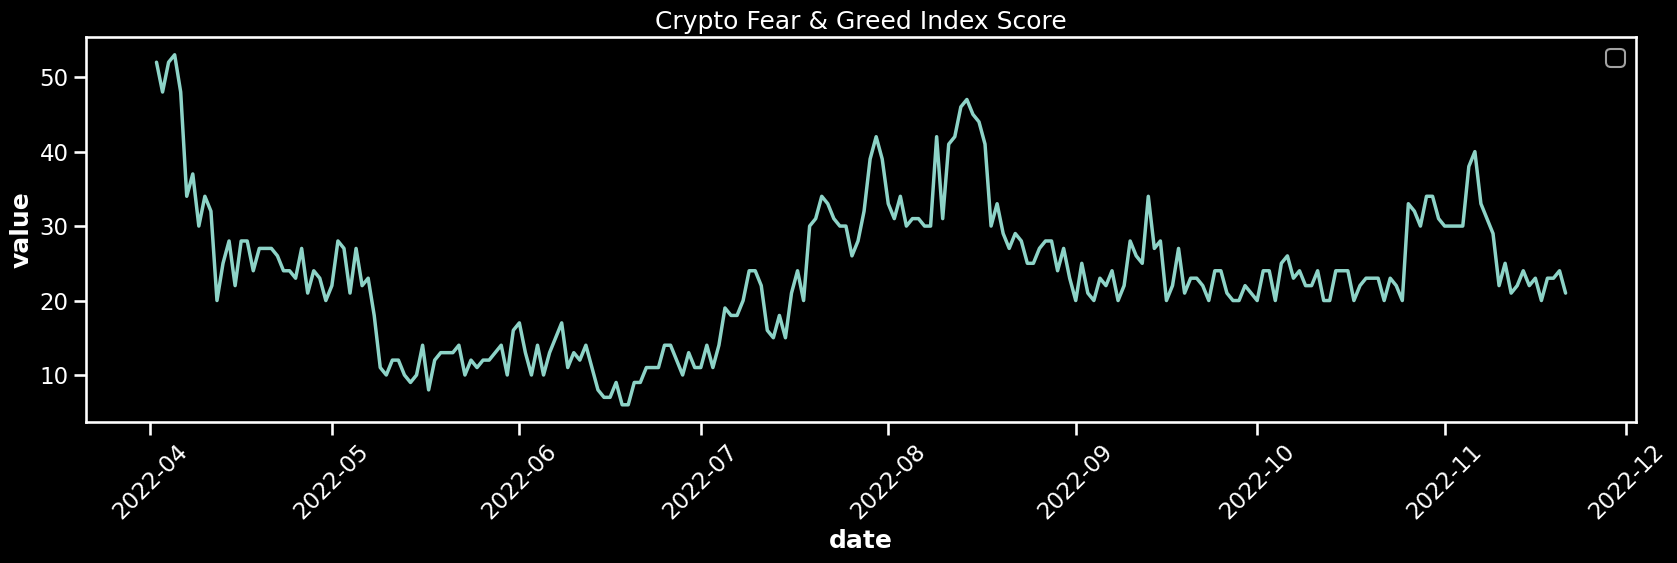

In [134]:
#@title
#@title


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.style.use("dark_background")
#sns.set_theme(style="darkgrid")

#Choose the date range
df_fear_greed = df_fear_greed[(df_fear_greed['date'] > '2022-04-01')]

df_fear_greed['value'] = df_fear_greed['value'].astype(int)
 
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_fear_greed, linewidth=2.5, x="date", y="value", sort=False)
#sns.lineplot(data=df, linewidth=2.5, x="date", y="TotalCapMrktCurUSD")
plt.title('Crypto Fear & Greed Index Score')

plt.xticks(rotation=45)

plt.legend()
plt.show()



# Technical Analysis

In [135]:
#@title S&P 500
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
import talib as ta

ticker='SPY'


ticker_y = yf.Ticker(ticker)
Name = ticker_y.info['longName']
ticker_y.info

df = yf.download(tickers=ticker, period='200d')


[*********************100%***********************]  1 of 1 completed


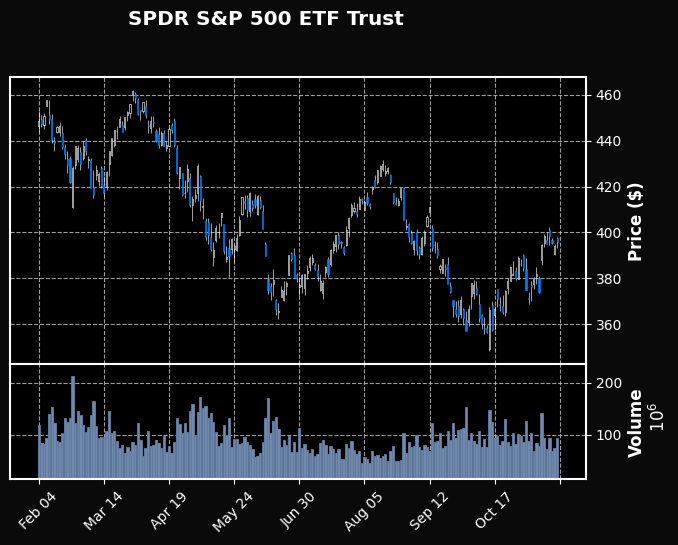

In [136]:
#@title
import mplfinance as fplt

fplt.plot(
            df,
            type='candle',
            style='mike',
            title=Name,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            )

[*********************100%***********************]  1 of 1 completed



Related News – ^VIX

– Stock Market News for Nov 15, 2022
– Stock Market News for Nov 14, 2022
– Stock Market News for Nov 11, 2022
– A slew of catalysts for a stock market rally are converging at the same time
– Stock Market News for Nov 8, 2022
– My 3 Biggest Stock Market Predictions for November
– Maintain a bearish stance after the Federal Reserve cast a pall over the stock market


/usr/local/lib/python3.7/dist-packages/mplfinance/plotting.py:678: UserWarning:

Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.



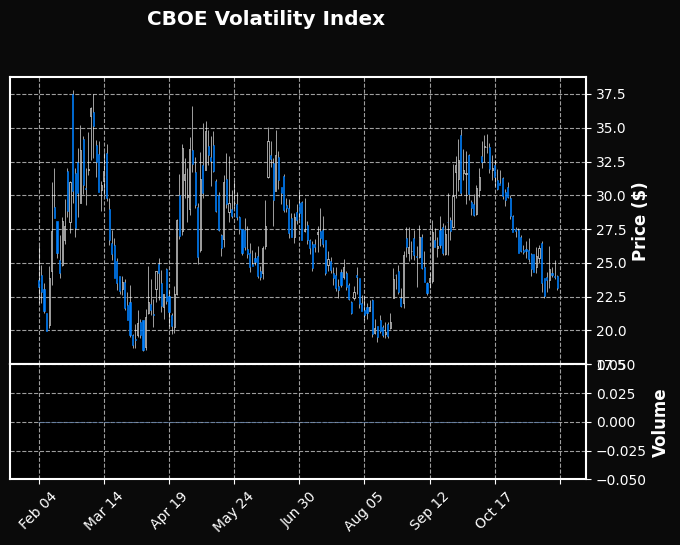

In [137]:
#@title  VIX
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='^VIX'


ticker_y = yf.Ticker(ticker)
Name = ticker_y.info['shortName']
ticker_y.info

data = yf.download(tickers=ticker, period='200d')

fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(
    title=Name,
    yaxis_title='Price',
   
)

fig.show()
ticker_y.info

print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass

import mplfinance as fplt

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=Name,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            )

In [138]:
#@title NASDAQ
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

plt.style.use("dark_background")

ticker='QQQ'


ticker_y = yf.Ticker(ticker)
Name = ticker_y.info['longName']
ticker_y.info

data = yf.download(tickers=ticker, period='200d')

fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(
    title=Name,
    yaxis_title='Price',
   
)

fig.show()
ticker_y.info

print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass


[*********************100%***********************]  1 of 1 completed



Related News – QQQ

– Nasdaq rips higher, S&P 500 gains as tech lifts stocks
– ETF investors are ‘trying to get back to core set of exposures’ amid surging inflows, expert says
– How Every Leveraged ETF Can Cost Investors Money
– Nasdaq leads market declines, British pound loses value against U.S. dollar
– Economic Data Gradually Dwindles: Jobless Claims, Productivity & More
– Nasdaq, S&P 500 sectors dragged down by the Fed rate hike news ahead of the close
– Investing in the Stock Market Could Turn Your $10,000 Into $300,000. Here's How.


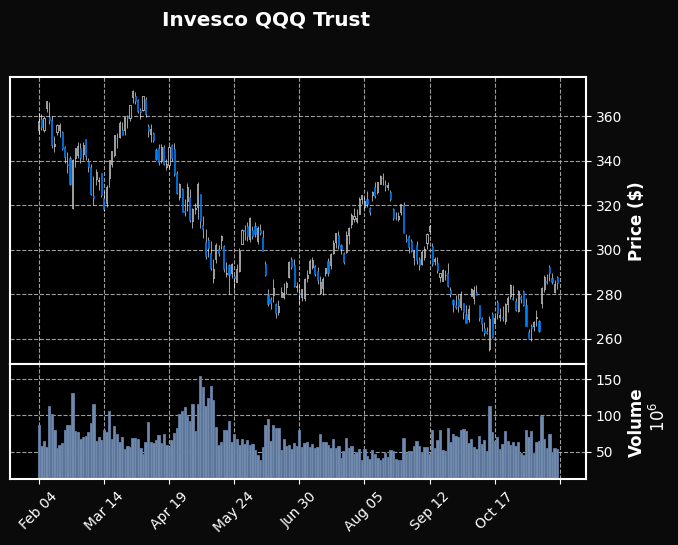

In [139]:
#@title

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=Name,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            )

[*********************100%***********************]  1 of 1 completed



Related News – BTC-USD



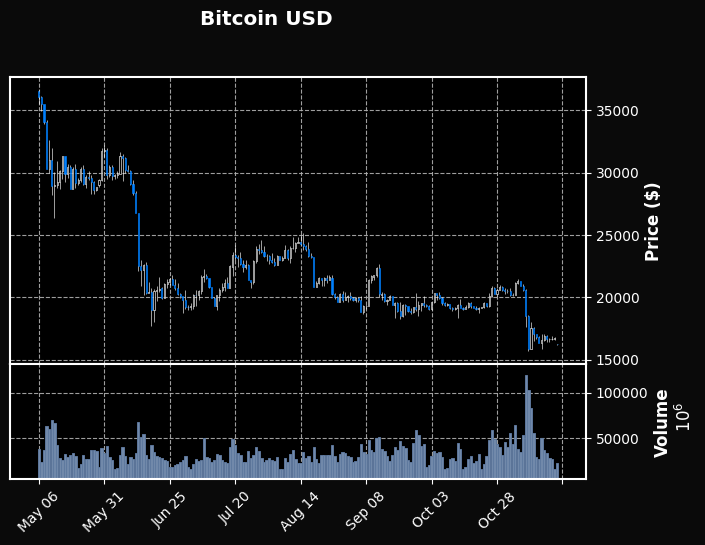

In [140]:
#@title Bitcoin
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='BTC-USD'


ticker_y = yf.Ticker(ticker)
Name = ticker_y.info['shortName']
ticker_y.info

data = yf.download(tickers=ticker, period='200d')

fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(
    title=Name,
    yaxis_title='Price',
   
)

fig.show()
ticker_y.info

print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass
  
fplt.plot(
            data,
            type='candle',
            style='mike',
            title=Name,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            )

[*********************100%***********************]  1 of 1 completed



Related News – ETH-USD

– The Return Trends At Secura Group (Catalist:43B) Look Promising
– Malaysia Latest: Parties Race to Form Government Before Deadline
– MEDIA ADVISORY - Government of Canada to make an announcement regarding home heating bills
– Best Smart TV Black Friday Deals 2022: Early LG, Samsung, TCL, Vizio, onn, Sony & More Sales Identified by The Consumer Post
– PRESS DIGEST- Financial Times - Nov 21
– Every Davante Adams catch from 2-TD game Week 11
– Younger Chinese are spurning factory jobs that power the economy


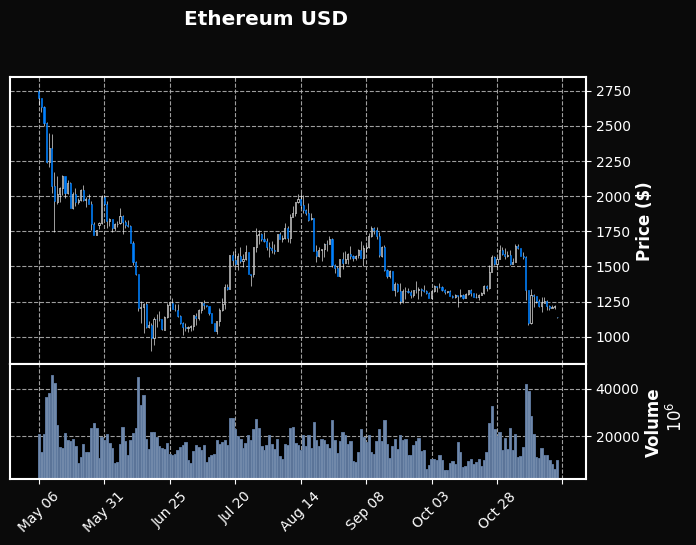

In [141]:
#@title Ethereum
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='ETH-USD'


ticker_y = yf.Ticker(ticker)
Name = ticker_y.info['shortName']
ticker_y.info

data = yf.download(tickers=ticker, period='200d')

fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(
    title=Name,
    yaxis_title='Price',
   
)

fig.show()
ticker_y.info

print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass

  
fplt.plot(
            data,
            type='candle',
            style='mike',
            title =Name,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DXY: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

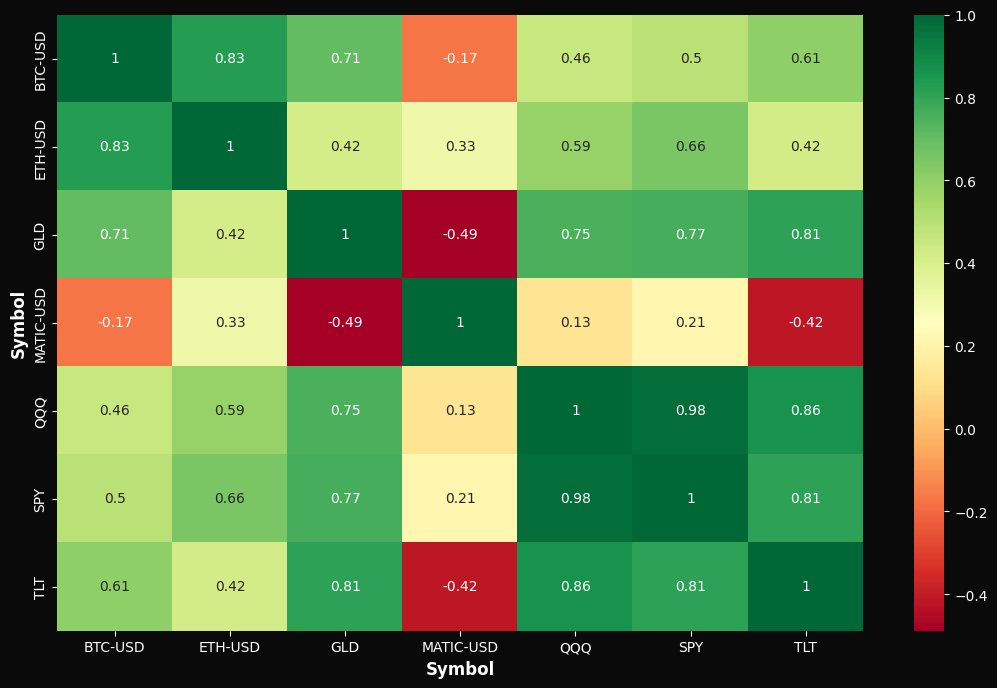

<Figure size 640x480 with 0 Axes>

In [142]:
#@title Correlation
import numpy as np 
import pandas as pd 
# Used to grab the stock prices, with yahoo 
import pandas_datareader as web 
from datetime import datetime 
# To visualize the results 
import matplotlib.pyplot as plt 
import seaborn

start = datetime(2022,9, 1)
symbols_list = ['MATIC-USD','SPY', 'QQQ', 'ETH-USD', 'BTC-USD', 'TLT', 'DXY', 'GLD']
#array to store prices
symbols=[]

#array to store prices
symbols=[]
for ticker in symbols_list:     
    
    r = yf.download(tickers=ticker, period='200d')
    # add a symbol column   
    r['Symbol'] = ticker    
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()
df_pivot=df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)
plt.figure(figsize=(13, 8))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

# Intraday Fundamentals

Connect to screener database

In [144]:
#@title

import requests
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq


cg = CoinGeckoAPI()

id = 'uniswap'
  
response = requests.get("https://api.coingecko.com/api/v3/coins/{}".format(id))
output = response.text
json_parsed = json.loads(output)
  


print('')  
print('MARKET DATA')  
print('')  



market_cap = json_parsed['market_data']['market_cap']['usd']
circulating_supply = json_parsed['market_data']['circulating_supply']
# circulating_supply.astype(int) 
current_price = json_parsed['market_data']['current_price']['usd']
# current_price.astype(int) 
fdv_to_tvl_rati = json_parsed['market_data']['fdv_to_tvl_ratio']
# fdv_to_tvl_ratio.astype(int) 
fully_diluted_valuation = json_parsed['market_data']['fully_diluted_valuation']['usd']
# fully_diluted_valuation
max_supply = json_parsed['market_data']['max_supply']
mcap_to_tvl_ratio = json_parsed['market_data']['mcap_to_tvl_ratio']
total_supply = json_parsed['market_data']['total_supply']
total_value_locked = json_parsed['market_data']['total_value_locked']['usd']
total_volume = json_parsed['market_data']['total_volume']['usd']

float_rotation_24h = total_volume / market_cap
circulating_cap = current_price * json_parsed['market_data']['circulating_supply']
total_cap = current_price * total_supply
max_cap = current_price * max_supply 
supply_expansion_multiple = max_supply  / circulating_supply


print('')  
try:
  
  circulating_versus_max = circulating_supply/total_supply
  market_cap_dilution_ratio =  fully_diluted_valuation / market_cap
  
  dict_custom = {}
  dict_custom['float_rotation_24h'] = float_rotation_24h
  dict_custom['supply_expansion_multiple'] = supply_expansion_multiple
  dict_custom['circulating_versus_max'] = circulating_versus_max
  dict_custom['market_cap_dilution_ratio'] = market_cap_dilution_ratio - 1
except ZeroDivisionError:
  print('null')
  
print(dict_custom )

print('          ') 


df_market = {}
df_market['market_cap'] = market_cap
#Final been up what is on the national emergency, informative or what basket is something the P is the spaciousness up to Sarah  ankedat1['circulating_supply'] = circulating_supply
df_market['current_price'] = current_price
# df_market['fdv_to_tvl_ratio'] = fdv_to_tvl_ratio#
df_market['fully_diluted_valuation'] = fully_diluted_valuation
# ankedat1['max_supply'] = max_supply
df_market['mcap_to_tvl_ratio'] = mcap_to_tvl_ratio
df_market['total_supply'] = total_supply
df_market['total_value_locked'] = total_value_locked
df_market['mcap_to_tvl_ratio'] = mcap_to_tvl_ratio
df_market['total_volume'] = total_volume


df_market




print('          ')  
print('PRICE ACTION')  
price_change_percentage_7d = json_parsed['market_data']['price_change_percentage_7d']
price_change_percentage_14d = json_parsed['market_data']['price_change_percentage_14d']
price_change_percentage_30d = json_parsed['market_data']['price_change_percentage_30d']
price_change_percentage_60d = json_parsed['market_data']['price_change_percentage_60d']
price_change_percentage_200d = json_parsed['market_data']['price_change_percentage_200d']
price_change_percentage_1y = json_parsed['market_data']['price_change_percentage_1y']



dict_return = {}
dict_return['price_change_percentage_7d'] = price_change_percentage_7d
dict_return['price_change_percentage_14d'] = price_change_percentage_14d
dict_return['price_change_percentage_30d'] = price_change_percentage_30d
dict_return['price_change_percentage_60d'] = price_change_percentage_60d
dict_return['price_change_percentage_200d'] = price_change_percentage_200d
dict_return['price_change_percentage_1y'] = price_change_percentage_1y

print(dict_return)



category = json_parsed['categories']

print('')  
print('CATEGORIES')  
print(category)
  



description  = [] 
pd.set_option('display.width', 10)
pd.set_option("display.max_rows", None, "display.max_columns", None)
description = json_parsed['description']['en']

print('')  
print('DESCRIPTION: ')
print(description)


links = json_parsed['links']

pd.set_option('display.width', 10)

print('')
print('WEB Links')
print(links)

#Status update




MARKET DATA


{'float_rotation_24h': 0.019286201996813124, 'supply_expansion_multiple': 1.3266704986836464, 'circulating_versus_max': 0.753766667, 'market_cap_dilution_ratio': 0.32667049891336886}
          
          
PRICE ACTION
{'price_change_percentage_7d': -6.50463, 'price_change_percentage_14d': -23.02527, 'price_change_percentage_30d': -9.67857, 'price_change_percentage_60d': 1.51443, 'price_change_percentage_200d': -31.62463, 'price_change_percentage_1y': -75.33213}

CATEGORIES
['Harmony Ecosystem', 'Avalanche Ecosystem', 'Decentralized Exchange (DEX)', 'Polygon Ecosystem', 'Arbitrum Ecosystem', 'Automated Market Maker (AMM)', 'Yield Farming', 'Decentralized Finance (DeFi)', 'Governance', 'Exchange-based Tokens', 'Gnosis Chain Ecosystem', 'BNB Chain Ecosystem', 'Ethereum Ecosystem', 'Optimism Ecosystem']

DESCRIPTION: 
UNI is the governance token for Uniswap, an Automated Market Marker DEX on the Ethereum blockchain. The UNI token allows token holders to participate in the go

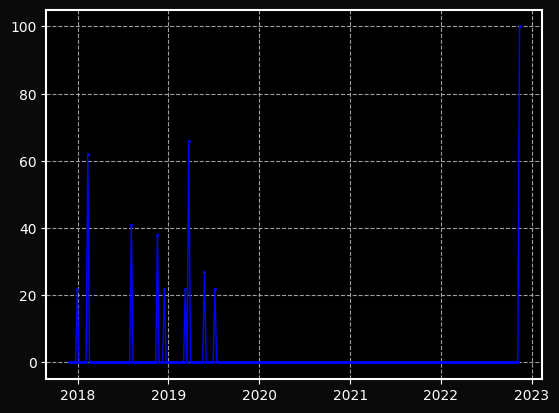

In [145]:
#@title

 
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq


cg = CoinGeckoAPI()
id='beefy-finance'
a = cg.get_coin_ohlc_by_id(id=id, vs_currency='usd', days = 'max')

df = pd.DataFrame(data=a, columns = ['Date','Open','High', 'Low', 'Close'])

fig2 = go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])
                      
fig2.show()

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(id)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

#print(interest_over_time_df.tail(10))
# multiple line plot
# multiple line plot
plt.plot( keyword, 'y1', data=df, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )

